In [1]:
import pandas as pd

In [2]:
print("sneh singh ")

sneh singh 


In [3]:
df=pd.read_csv('/Admission.csv')
df.head()

,GPA,GMAT,Decision
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [4]:
inputs = df.drop('Decision',axis='columns')

In [5]:
target = df['Decision']

In [6]:
inputs

,GPA,GMAT
0,2.96,596
1,3.14,473
2,3.22,482
3,3.29,527
4,3.69,505
...,...,...
80,3.05,399
81,2.85,483
82,3.01,453
83,3.03,414


In [7]:
target

0      admit
1      admit
2      admit
3      admit
4      admit
       ...  
80    border
81    border
82    border
83    border
84    border
Name: Decision, Length: 85, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(inputs, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
model.score(inputs,target)

1.0

In [14]:
model.predict([[1,1]])

array(['notadmit'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state=101)

In [16]:
model = tree.DecisionTreeClassifier(criterion='entropy')

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
predictions = model.predict(X_test)
print(X_test)
print(y_test)
print(predictions)


     GPA  GMAT
16  3.47   552
37  2.51   412
68  3.13   416
51  2.41   489
55  2.55   528
6   3.03   626
21  3.58   564
30  3.24   467
26  3.60   609
1   3.14   473
72  2.91   446
25  3.26   664
22  3.33   565
2   3.22   482
27  3.37   559
13  3.78   591
53  2.35   321
16       admit
37    notadmit
68      border
51    notadmit
55    notadmit
6        admit
21       admit
30       admit
26       admit
1        admit
72      border
25       admit
22       admit
2        admit
27       admit
13       admit
53    notadmit
Name: Decision, dtype: object
['admit' 'notadmit' 'border' 'notadmit' 'notadmit' 'admit' 'admit' 'admit'
 'admit' 'border' 'border' 'admit' 'admit' 'admit' 'admit' 'admit'
 'notadmit']


In [19]:
model.score(X_test,y_test)

0.9411764705882353

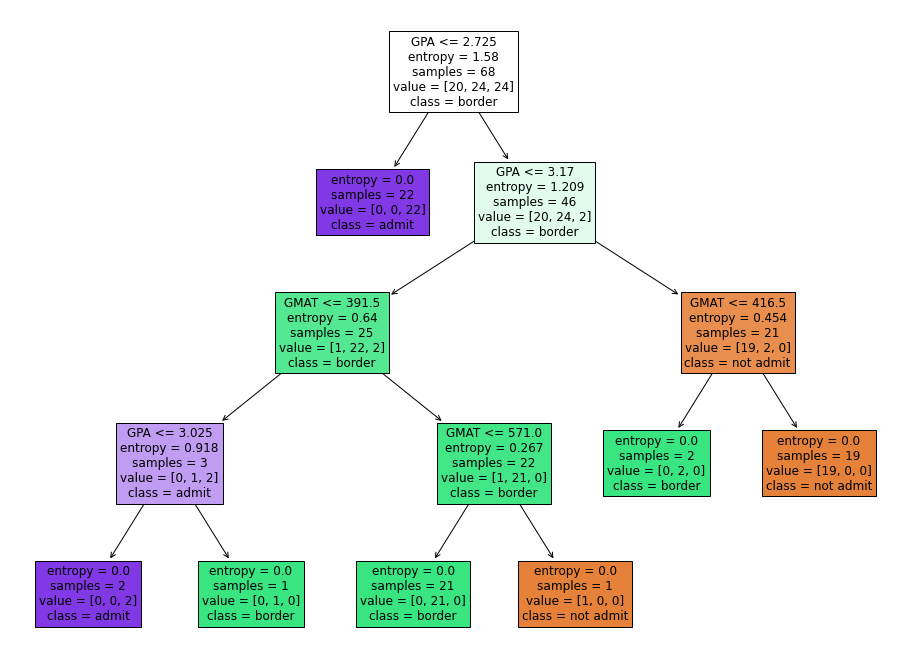

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(model, feature_names=df.columns, fontsize=12, filled=True, 
              class_names=['not admit','border', 'admit'])